In [1]:
import pandas as pd
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
import numpy as np

# tf.debugging.set_log_device_placement(True)
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip -q -o "/content/drive/MyDrive/00_Data_Science/09_rsna_atd/data.zip" -d "/content/09_rsna_atd"

In [4]:
data = '/content/09_rsna_atd/data/'

In [5]:
pic_paths = glob.glob(os.path.join(data, 'train_images', '*', '*', '*.png'))

In [6]:
df_data_label = pd.read_csv(os.path.join(data, 'train.csv'))

In [7]:
df_data_label

# model1: bowel, bowel_injury,
# model2: extra: extravasation_injury,
# model3: kidney: kidney_healthy	kidney_low	kidney_high
# model4: liver: liver_healthy	liver_low	liver_high
# model5: spleen: spleen_healthy	spleen_low	spleen_high

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,...,spleen_healthy,spleen_low,spleen_high,any_injury,series_id,instance_number,injury_name,image_path,width,height
0,10004,1,0,0,1,0,1,0,1,0,...,0,0,1,1,21057,362,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512
1,10004,1,0,0,1,0,1,0,1,0,...,0,0,1,1,21057,363,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512
2,10004,1,0,0,1,0,1,0,1,0,...,0,0,1,1,21057,364,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512
3,10004,1,0,0,1,0,1,0,1,0,...,0,0,1,1,21057,365,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512
4,10004,1,0,0,1,0,1,0,1,0,...,0,0,1,1,21057,366,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13010,9632,1,0,0,1,1,0,0,1,0,...,1,0,0,1,3750,155,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512
13011,9632,1,0,0,1,1,0,0,1,0,...,1,0,0,1,3750,156,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512
13012,9632,1,0,0,1,1,0,0,1,0,...,1,0,0,1,3750,157,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512
13013,9632,1,0,0,1,1,0,0,1,0,...,1,0,0,1,3750,158,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512


In [8]:
# data = '/content/drive/MyDrive/00_Data_Science/09_rsna_atd/data'
pic_path = glob.glob(os.path.join(data, 'train_images', '*', '*', '*.png'))
df_data_label = pd.read_csv(os.path.join(data, 'train.csv'))

df_data_label['image_path']= df_data_label['image_path'].str.replace("/kaggle/input/rsna-2023-abdominal-trauma-detection/", data, regex=False)
df_data_label['image_path']= df_data_label['image_path'].str.replace(".dcm", '.png', regex=False)

In [9]:
df_data_label

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,...,spleen_healthy,spleen_low,spleen_high,any_injury,series_id,instance_number,injury_name,image_path,width,height
0,10004,1,0,0,1,0,1,0,1,0,...,0,0,1,1,21057,362,Active_Extravasation,/content/09_rsna_atd/data/train_images/10004/2...,512,512
1,10004,1,0,0,1,0,1,0,1,0,...,0,0,1,1,21057,363,Active_Extravasation,/content/09_rsna_atd/data/train_images/10004/2...,512,512
2,10004,1,0,0,1,0,1,0,1,0,...,0,0,1,1,21057,364,Active_Extravasation,/content/09_rsna_atd/data/train_images/10004/2...,512,512
3,10004,1,0,0,1,0,1,0,1,0,...,0,0,1,1,21057,365,Active_Extravasation,/content/09_rsna_atd/data/train_images/10004/2...,512,512
4,10004,1,0,0,1,0,1,0,1,0,...,0,0,1,1,21057,366,Active_Extravasation,/content/09_rsna_atd/data/train_images/10004/2...,512,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13010,9632,1,0,0,1,1,0,0,1,0,...,1,0,0,1,3750,155,Active_Extravasation,/content/09_rsna_atd/data/train_images/9632/37...,512,512
13011,9632,1,0,0,1,1,0,0,1,0,...,1,0,0,1,3750,156,Active_Extravasation,/content/09_rsna_atd/data/train_images/9632/37...,512,512
13012,9632,1,0,0,1,1,0,0,1,0,...,1,0,0,1,3750,157,Active_Extravasation,/content/09_rsna_atd/data/train_images/9632/37...,512,512
13013,9632,1,0,0,1,1,0,0,1,0,...,1,0,0,1,3750,158,Active_Extravasation,/content/09_rsna_atd/data/train_images/9632/37...,512,512


In [10]:
# df_data = df_data_label[['bowel_injury', 'image_path', 'extravasation_injury']].drop_duplicates()
df_data = df_data_label[['patient_id', 'series_id', 'instance_number', 'image_path',
                         'bowel_injury', 'extravasation_injury',
                         'kidney_healthy','kidney_low','kidney_high',
                         'liver_healthy', 'liver_low', 'liver_high',
                         'spleen_healthy', 'spleen_low', 'spleen_high'
                        ]].drop_duplicates()

In [11]:
df_data

,patient_id,series_id,instance_number,image_path,bowel_injury,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high
0,10004,21057,362,/content/09_rsna_atd/data/train_images/10004/2...,0,1,0,1,0,1,0,0,0,0,1
1,10004,21057,363,/content/09_rsna_atd/data/train_images/10004/2...,0,1,0,1,0,1,0,0,0,0,1
2,10004,21057,364,/content/09_rsna_atd/data/train_images/10004/2...,0,1,0,1,0,1,0,0,0,0,1
3,10004,21057,365,/content/09_rsna_atd/data/train_images/10004/2...,0,1,0,1,0,1,0,0,0,0,1
4,10004,21057,366,/content/09_rsna_atd/data/train_images/10004/2...,0,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13010,9632,3750,155,/content/09_rsna_atd/data/train_images/9632/37...,0,1,1,0,0,1,0,0,1,0,0
13011,9632,3750,156,/content/09_rsna_atd/data/train_images/9632/37...,0,1,1,0,0,1,0,0,1,0,0
13012,9632,3750,157,/content/09_rsna_atd/data/train_images/9632/37...,0,1,1,0,0,1,0,0,1,0,0
13013,9632,3750,158,/content/09_rsna_atd/data/train_images/9632/37...,0,1,1,0,0,1,0,0,1,0,0


In [ ]:
# df_data['bowel_injury']= df_data['bowel_injury'].astype(str)
# df_data['extravasation_injury']= df_data['extravasation_injury'].astype(str)
# df_data['kidney_healthy','kidney_low', 'kidney_high']

In [12]:
df_data['kidney_classes'] = tf.argmax(df_data[['kidney_healthy','kidney_low', 'kidney_high']], axis=1)
df_data['kidney_classes'] = df_data['kidney_classes'].map({0: "kidney_healthy",
                                                            1: "kidney_low",
                                                            2: "kidney_high"})
df_data['kidney_category'] = df_data[['kidney_healthy','kidney_low','kidney_high']].apply(lambda x: x.tolist(), axis=1)

In [13]:
df_data['liver_classes'] = tf.argmax(df_data[['liver_healthy', 'liver_low', 'liver_high']], axis=1)
df_data['liver_classes'] = df_data['liver_classes'].map({0: "liver_healthy",
                                                          1: "liver_low",
                                                          2: "liver_high"})
df_data['liver_category'] = df_data[['liver_healthy','liver_low','liver_high']].apply(lambda x: x.tolist(), axis=1)

In [14]:
df_data['spleen_classes'] = tf.argmax(df_data[['spleen_healthy', 'spleen_low', 'spleen_high']], axis=1)
df_data['spleen_classes'] = df_data['spleen_classes'].map({0: "spleen_healthy",
                                                            1: "spleen_low",
                                                            2: "spleen_high"})
# very interesting; when use multi-output, it has to be like this, but if we are using categorical; it is not like this
df_data['spleen_category'] = df_data[['spleen_healthy', 'spleen_low', 'spleen_high']].apply(lambda x: x.tolist(), axis=1)

In [15]:
df_data.head()

,patient_id,series_id,instance_number,image_path,bowel_injury,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,...,liver_high,spleen_healthy,spleen_low,spleen_high,kidney_classes,kidney_category,liver_classes,liver_category,spleen_classes,spleen_category
0,10004,21057,362,/content/09_rsna_atd/data/train_images/10004/2...,0,1,0,1,0,1,...,0,0,0,1,kidney_low,"[0, 1, 0]",liver_healthy,"[1, 0, 0]",spleen_high,"[0, 0, 1]"
1,10004,21057,363,/content/09_rsna_atd/data/train_images/10004/2...,0,1,0,1,0,1,...,0,0,0,1,kidney_low,"[0, 1, 0]",liver_healthy,"[1, 0, 0]",spleen_high,"[0, 0, 1]"
2,10004,21057,364,/content/09_rsna_atd/data/train_images/10004/2...,0,1,0,1,0,1,...,0,0,0,1,kidney_low,"[0, 1, 0]",liver_healthy,"[1, 0, 0]",spleen_high,"[0, 0, 1]"
3,10004,21057,365,/content/09_rsna_atd/data/train_images/10004/2...,0,1,0,1,0,1,...,0,0,0,1,kidney_low,"[0, 1, 0]",liver_healthy,"[1, 0, 0]",spleen_high,"[0, 0, 1]"
4,10004,21057,366,/content/09_rsna_atd/data/train_images/10004/2...,0,1,0,1,0,1,...,0,0,0,1,kidney_low,"[0, 1, 0]",liver_healthy,"[1, 0, 0]",spleen_high,"[0, 0, 1]"


In [16]:
target_list_1 = ['bowel_injury', 'extravasation_injury', 'kidney_classes', 'liver_classes', 'spleen_classes']
target_list_2 = ['bowel_injury', 'extravasation_injury', 'kidney_category', 'liver_category', 'spleen_category']

In [17]:
def split_group(group, test_size=0.2):
    if len(group) == 1:
        #case one: condition when group has only 1 element.
        return (group, pd.DataFrame()) if np.random.rand() < test_size else (pd.DataFrame(), group)
    else:
        return train_test_split(group, test_size=test_size, random_state=42)


In [49]:
# Initialize the train and validation datasets
# df_train = pd.DataFrame()
# df_val = pd.DataFrame()

# # Iterate through the groups and split them, handling single-sample groups
# for _, group in df_data.groupby(target_list_1):
# #     print(len(group))
#     train_group, val_group = split_group(group)
#     df_train = pd.concat([df_train, train_group], ignore_index=True)  # this is to keep adding more data to the dataframe
#     df_val = pd.concat([df_val, val_group], ignore_index=True)   # this is to keep adding more data to the dataframe

# set_train_patient_id = set(df_train['patient_id'])
# set_val_patient_id = set(df_val['patient_id'])
# len(set_train_patient_id.intersection(set_val_patient_id))/len(set_val_patient_id)

Patient level test / train split

In [18]:
df_data.sort_values(by=['patient_id', 'series_id', 'instance_number'], ascending=True, inplace=True)
df_data_patient = df_data.drop_duplicates(subset=['patient_id'], keep='last').copy()

In [19]:
df_train_patient = pd.DataFrame()
df_val_patient = pd.DataFrame()

# # Iterate through the groups and split them, handling single-sample groups
for _, group in df_data_patient.groupby(target_list_1):
    # print(len(group))
    train_group, val_group = split_group(group)
    df_train_patient = pd.concat([df_train_patient, train_group], ignore_index=True)  # this is to keep adding more data to the dataframe
    df_val_patient = pd.concat([df_val_patient, val_group], ignore_index=True)   # this is to keep adding more data to the dataframe

set_train_patient_id = set(df_train_patient['patient_id'])
set_val_patient_id = set(df_val_patient['patient_id'])
len(set_train_patient_id.intersection(set_val_patient_id))/len(set_val_patient_id)

0.0

In [20]:
df_train = df_data[df_data['patient_id'].isin(set_train_patient_id)]
df_val = df_data[df_data['patient_id'].isin(set_val_patient_id)]

In [21]:
set_train_patient_id = set(df_train['patient_id'])
set_val_patient_id = set(df_val['patient_id'])
len(set_train_patient_id.intersection(set_val_patient_id))/len(set_val_patient_id)

0.0

In [22]:
# roughly same distribution
# df_train.groupby(['kidney_classes'])['image_path'].count()/df_train.shape[0]
# df_train.groupby(['liver_classes'])['image_path'].count()/df_train.shape[0]
df_train.groupby(['spleen_classes'])['image_path'].count()/df_train.shape[0]


spleen_classes
spleen_healthy    0.715092
spleen_high       0.159636
spleen_low        0.125272
Name: image_path, dtype: float64

In [23]:
# roughly same distribution
# df_val.groupby(['kidney_classes'])['image_path'].count()/df_val.shape[0]
# df_val.groupby(['liver_classes'])['image_path'].count()/df_val.shape[0]
df_val.groupby(['spleen_classes'])['image_path'].count()/df_val.shape[0]

spleen_classes
spleen_healthy    0.618946
spleen_high       0.207386
spleen_low        0.173669
Name: image_path, dtype: float64

In [25]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest'
                                  )
train_generator = train_datagen.flow_from_dataframe(
    dataframe = df_train,
    directory=None,
    x_col='image_path',
    y_col = target_list_2,
    weight_col=None,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='multi_output',
    batch_size=32,
    shuffle=True,
    seed=1,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    interpolation='nearest',
    validate_filenames=True)

val_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = val_datagen.flow_from_dataframe(
    dataframe = df_val,
    directory=None,
    x_col='image_path',
    y_col = target_list_2,
    weight_col=None,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='multi_output',
    batch_size=32,
    shuffle=True,
    seed=1,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    interpolation='nearest',
    validate_filenames=True)

Found 7799 validated image filenames.
Found 3737 validated image filenames.


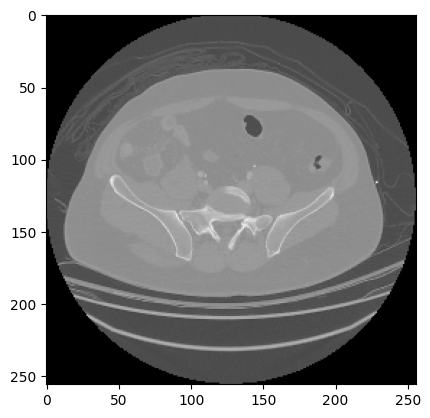

In [26]:
image = validation_generator.next()
plt.imshow(image[0][0])
plt.show()

# Inception Network: Transfer Learning

In [27]:
import urllib.request
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model

weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)

pre_trained_model = InceptionV3(input_shape=(256, 256, 3),
                                include_top=False,
                                weights=None)

pre_trained_model.load_weights(weights_file)
for layer in pre_trained_model.layers:
    layer.trainable = False

In [28]:
# pre_trained_model.summary()

In [29]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 14, 14, 768)


In [30]:
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)

# Define 'necks' for each head
x_bowel = tf.keras.layers.Dense(32, activation='relu')(x)
x_extra = tf.keras.layers.Dense(32, activation='relu')(x)
x_kidney = tf.keras.layers.Dense(32, activation='relu')(x)
x_liver = tf.keras.layers.Dense(32, activation='relu')(x)
x_spleen = tf.keras.layers.Dense(32, activation='relu')(x)

# Define heads

y_bowel = tf.keras.layers.Dense(1, activation='sigmoid', name='bowel')(x_bowel)
y_extra = tf.keras.layers.Dense(1, activation='sigmoid', name='extra')(x_extra)
y_kidney = tf.keras.layers.Dense(3, activation='softmax', name='kidney')(x_kidney)
y_liver = tf.keras.layers.Dense(3, activation='softmax', name='liver')(x_liver)
y_spleen = tf.keras.layers.Dense(3, activation='softmax', name='spleen')(x_spleen)

model = Model(pre_trained_model.input, [y_bowel, y_extra, y_kidney, y_liver, y_spleen])


In [31]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_normalization[0][0

In [39]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [43]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy',
          # optimizer=RMSprop(learning_rate=0.001),  # 0.001 is the default optimizer
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])
history = model.fit(train_generator, epochs=50, validation_data=validation_generator, callbacks=[callback])

Epoch 1/50
244/244 [==============================] - 139s 548ms/step - loss: 1.1529 - bowel_loss: 0.2591 - extra_loss: 0.2063 - kidney_loss: 0.1119 - liver_loss: 0.1496 - spleen_loss: 0.4260 - bowel_accuracy: 0.8931 - extra_accuracy: 0.9168 - kidney_accuracy: 0.9474 - liver_accuracy: 0.9135 - spleen_accuracy: 0.7530 - val_loss: 3.8360 - val_bowel_loss: 1.0053 - val_extra_loss: 1.1303 - val_kidney_loss: 0.6011 - val_liver_loss: 0.5364 - val_spleen_loss: 0.5628 - val_bowel_accuracy: 0.6516 - val_extra_accuracy: 0.6224 - val_kidney_accuracy: 0.7597 - val_liver_accuracy: 0.7894 - val_spleen_accuracy: 0.6294
Epoch 2/50
244/244 [==============================] - 131s 536ms/step - loss: 1.0310 - bowel_loss: 0.2301 - extra_loss: 0.1740 - kidney_loss: 0.0936 - liver_loss: 0.1361 - spleen_loss: 0.3972 - bowel_accuracy: 0.9045 - extra_accuracy: 0.9313 - kidney_accuracy: 0.9546 - liver_accuracy: 0.9176 - spleen_accuracy: 0.7601 - val_loss: 4.2040 - val_bowel_loss: 1.2319 - val_extra_loss: 1.2777 

In [44]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_normalization[0][0

In [34]:
# model.save(os.path.join('/Users/ryansun/Desktop/DS/rsna_atd/models', 'model_3c_inception.keras'))
model.save(os.path.join('/content/drive/MyDrive/00_Data_Science/09_rsna_atd/models/', 'model_3c_inception_partial_no_dup.keras'))


In [35]:
df_hist = pd.DataFrame(model.history.history)
df_hist.to_csv(os.path.join('/content/drive/MyDrive/00_Data_Science/09_rsna_atd/models/', 'model_3c_inception_partial_no_dup_history.csv'), index=True)

In [36]:
df_hist

,loss,bowel_loss,extra_loss,kidney_loss,liver_loss,spleen_loss,bowel_accuracy,extra_accuracy,kidney_accuracy,liver_accuracy,...,val_bowel_loss,val_extra_loss,val_kidney_loss,val_liver_loss,val_spleen_loss,val_bowel_accuracy,val_extra_accuracy,val_kidney_accuracy,val_liver_accuracy,val_spleen_accuracy
0,7.179304,2.392723,1.663836,0.840901,1.391914,0.889927,0.565329,0.698423,0.881908,0.797282,...,0.732054,0.662635,0.471009,0.400298,0.562713,0.357238,0.624298,0.787798,0.778164,0.618946
1,2.215705,0.684926,0.603413,0.180682,0.257439,0.489245,0.568150,0.712014,0.898577,0.842159,...,0.743294,0.854626,0.571369,0.451715,0.552694,0.357238,0.624298,0.796361,0.780037,0.618946
2,2.026716,0.684618,0.505016,0.153892,0.209248,0.473941,0.567252,0.712143,0.917682,0.893191,...,0.742737,0.646188,0.565985,0.482994,0.555306,0.357238,0.624298,0.759968,0.783784,0.618946
3,1.786581,0.599395,0.389793,0.137276,0.188216,0.471900,0.653674,0.784203,0.932940,0.895243,...,0.879751,0.760860,0.614569,0.511528,0.558863,0.669521,0.639818,0.783784,0.777629,0.618946
4,1.544370,0.440188,0.330349,0.129244,0.173110,0.471479,0.817284,0.860751,0.936787,0.901910,...,0.881737,0.945965,0.725751,0.438150,0.524994,0.678619,0.630452,0.788601,0.774418,0.645438


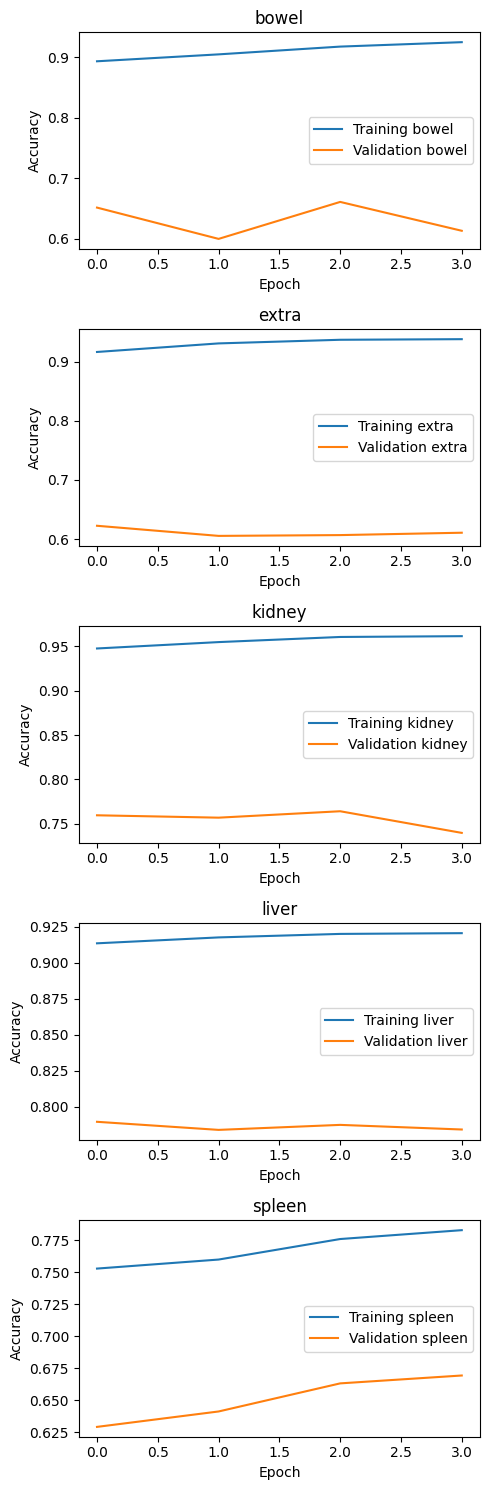

In [45]:
# Create a 3x2 grid for the subplots
fig, axes = plt.subplots(5, 1, figsize=(5, 15))

# Flatten axes to iterate through them
axes = axes.flatten()

# Iterate through the metrics and plot them
for i, name in enumerate(["bowel", "extra", "kidney", "liver", "spleen"]):
    # Plot training accuracy
    axes[i].plot(history.history[name + '_accuracy'], label='Training ' + name)
    # Plot validation accuracy
    axes[i].plot(history.history['val_' + name + '_accuracy'], label='Validation ' + name)
    axes[i].set_title(name)
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Accuracy')
    axes[i].legend()

plt.tight_layout()
plt.show()

# model_loaded = tf.keras.models.load_model(os.path.join('/Users/ryansun/Desktop/DS/rsna_atd/models', 'model_3c_inception.keras'))

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.13.0


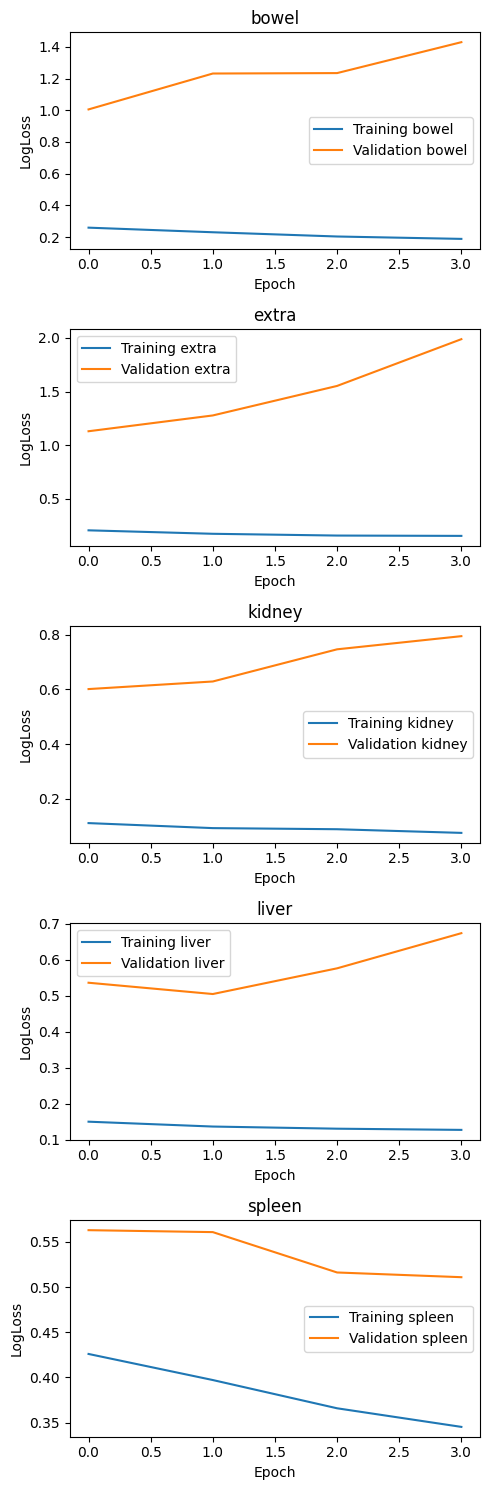

In [46]:
fig, axes = plt.subplots(5, 1, figsize=(5, 15))

# Flatten axes to iterate through them
axes = axes.flatten()

# Iterate through the metrics and plot them
for i, name in enumerate(["bowel", "extra", "kidney", "liver", "spleen"]):
    # Plot training accuracy
    axes[i].plot(history.history[name + '_loss'], label='Training ' + name)
    # Plot validation accuracy
    axes[i].plot(history.history['val_' + name + '_loss'], label='Validation ' + name)
    axes[i].set_title(name)
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('LogLoss')
    axes[i].legend()

plt.tight_layout()
plt.show()